In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Jabalpur.csv')

In [4]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,RH Chicken Point,350,"North Indian,Fast Food,Kebab",Jabalpur,Cantt,Quick Bites,11am to 11pm(Mon-Sun),Excellent,4.6,485
1,Domino's Pizza,500,"Italian,Pizza",Jabalpur,Napier Town,Quick Bites,11am to 12midnight(Mon-Sun),Very Good,4.3,205
2,Badkul Restaurant,500,"North Indian,Fast Food,Chinese",Jabalpur,Vijay Nagar,Casual Dining,11am to 11pm(Mon-Sun),Very Good,4.0,306
3,Riyaz Hotel - 1953,300,"Biryani,North Indian",Jabalpur,Napier Town,Quick Bites,11am to 11pm(Mon-Sun),Very Good,4.3,356
4,Wok n More,650,"Chinese,Thai",Jabalpur,Civil Lines,Quick Bites,11am to 11pm(Mon-Sun),Very Good,4.4,103


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
Name                273 non-null object
Price               273 non-null int64
Cuisine_Category    273 non-null object
City                273 non-null object
Region              273 non-null object
Cuisine_Type        273 non-null object
Timing              273 non-null object
Rating_Types        273 non-null object
Rating              273 non-null float64
Votes               273 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 21.4+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [6]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [7]:
data.describe()

,Price,Rating,Votes
count,273.000000,273.000000,273.000000
mean,398.241758,3.493407,39.816850
std,260.659204,0.408135,54.900607
min,70.000000,2.500000,4.000000
25%,200.000000,3.200000,10.000000
50%,350.000000,3.500000,20.000000
75%,500.000000,3.800000,47.000000
max,1500.000000,4.800000,485.000000


In [8]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [9]:
data.Name.value_counts().head()

Street Food Corner    2
Punjab Restaurant     2
7 Eleven              2
Hira Sweets           2
FnP Cakes 'n' More    2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [10]:
data['Region'].value_counts()[:10]

Napier Town     87
Vijay Nagar     40
Cantt           33
Wright Town     29
Civil Lines     22
Rampur          20
Khamaria        12
Ganjipura        8
Hathital         8
Shakti Nagar     4
Name: Region, dtype: int64

Text(0.5,1,'Region')

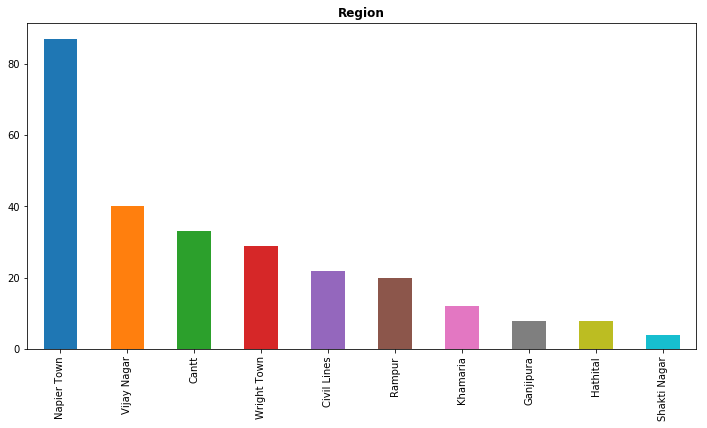

In [11]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

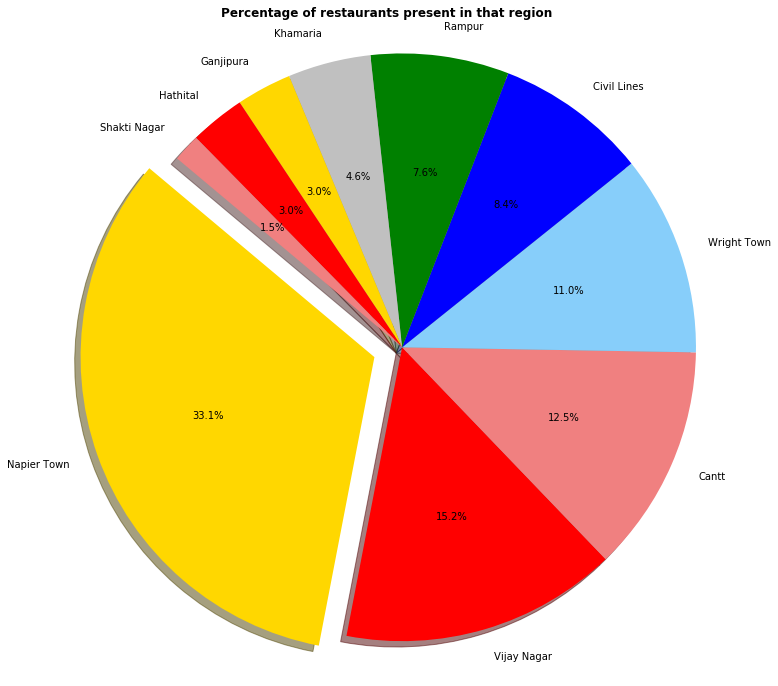

In [12]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [13]:
data['Rating_Types'].value_counts().head(10)

Average      129
Good         108
Very Good     32
Excellent      4
Name: Rating_Types, dtype: int64

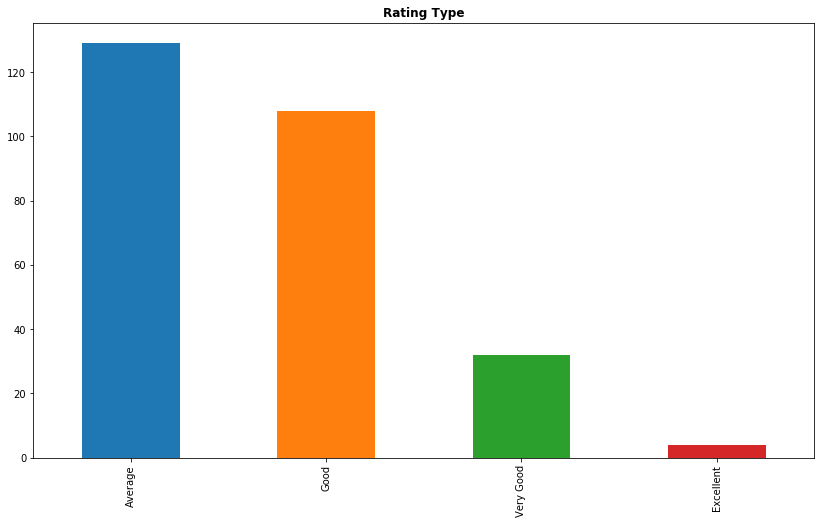

In [14]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [15]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       129
Casual Dining      62
Beverage Shop      13
Bakery             13
Café               13
Sweet Shop         12
Dessert Parlor      9
none                7
Food Court          5
Fine Dining         3
Name: Cuisine_Type, dtype: int64

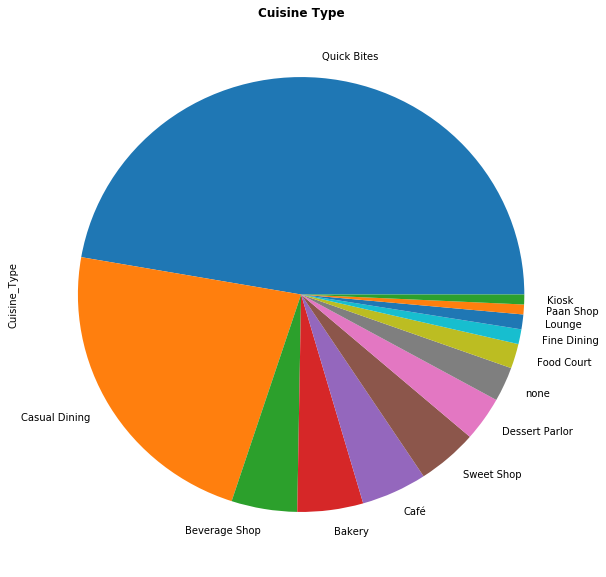

In [16]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [17]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [18]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [19]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.493406593406594


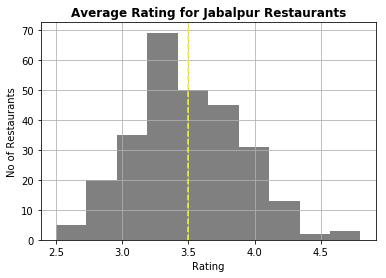

In [20]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Jabalpur Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [22]:
#Average rating per restaurant in Jabalpur is found to be around 3.49

# Top cuisines in Jabalpur

In [23]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

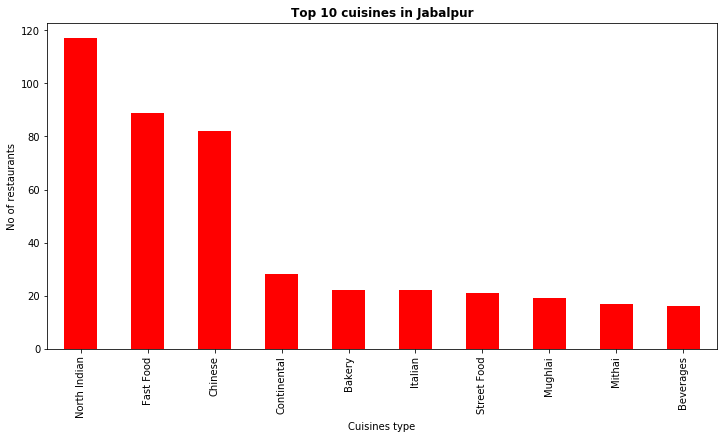

In [24]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Jabalpur',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [25]:
data['Price'].value_counts()[:20]

200     40
300     39
400     34
500     32
250     21
100     18
150     16
600     16
350     12
450      9
800      5
1000     5
750      5
1500     5
700      5
1200     3
550      3
650      2
900      1
850      1
Name: Price, dtype: int64

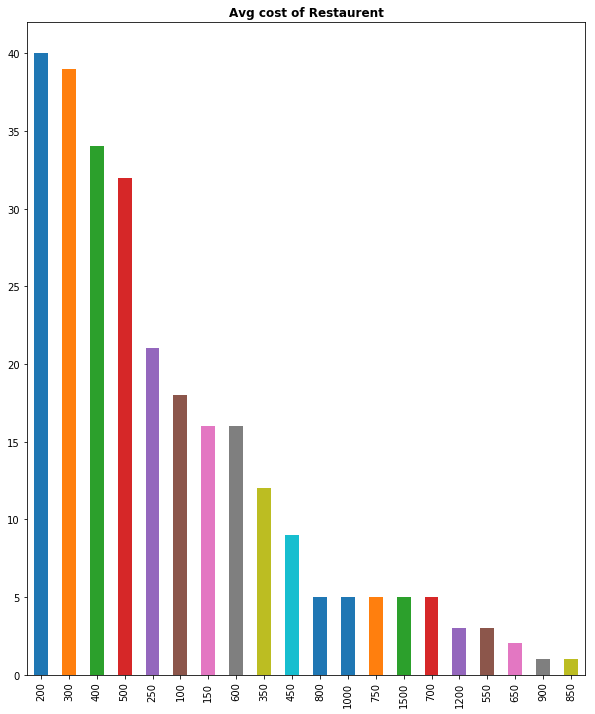

In [26]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [28]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

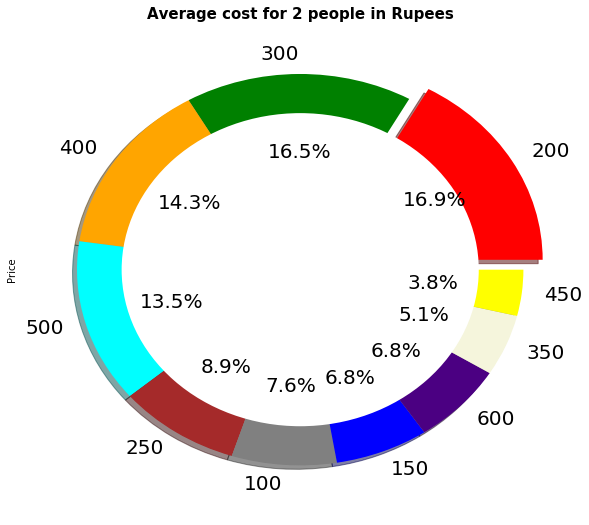

In [29]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 200